In [ ]:
# imports
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [ ]:
# read the dataset
df = pd.read_csv('dataset.csv')
df.head()

,NO,Date,Place,Event,Product,Sales (RM),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,1,02.08.2024,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,03.08.2024,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,04.08.2024,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,09.08.2024,"D'Bendang Sg Rambai, Melaka",Festival D'Bendang Sg Rambai Melaka 2024,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,10.08.2024,"D'Bendang Sg Rambai, Melaka",Festival D'Bendang Sg Rambai Melaka 2024,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# converting date column to day and month
df['Day'] = df['Date'].str[:2].astype(int)
df['Month'] = df['Date'].str[3:5].astype(int)
df.head()

,NO,Date,Place,Event,Product,Sales (RM),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Day,Month
0,1,02.08.2024,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8
1,2,03.08.2024,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8
2,3,04.08.2024,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8
3,4,09.08.2024,"D'Bendang Sg Rambai, Melaka",Festival D'Bendang Sg Rambai Melaka 2024,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,8
4,5,10.08.2024,"D'Bendang Sg Rambai, Melaka",Festival D'Bendang Sg Rambai Melaka 2024,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8


In [ ]:
# remove column 'No' and Date
df = df.drop(columns=['NO','Date'])

Product rates:
Soft toys: 25
Keychain: 4
Batu Seremban:5
Pencil Case: 10
purse batik: 20

In [ ]:
# generating random qty of products sold

# Prices of products
prices = {
    "Soft Toys": 25,
    "Keychain": 4,
    "Batu Seremban": 5,
    "Pencil Case": 10,
    "Purse Batik": 20
}

# Generate one random valid combination for target_sales
def generate_random_combination(target_sales):
    items = list(prices.items())
    combination = {item: 0 for item in prices.keys()}
    remaining_sales = target_sales

    while remaining_sales > 0:
        # Randomly select a product
        product, price = random.choice(items)

        # Determine the maximum quantity that can be selected for this product
        max_qty = remaining_sales // price

        if max_qty > 0:
            # Randomly pick a quantity (including zero)
            qty = random.randint(0, max_qty)
            combination[product] += qty
            remaining_sales -= qty * price
        else:
            # If no more of this product can be selected, remove it from consideration
            items.remove((product, price))
            if not items:
                break  # Exit if no products can be selected

    return combination

# Assign random combinations to each row
def assign_random_combination(row):
    target_sales = row["Sales (RM)"]
    return generate_random_combination(target_sales)

# Apply the function to each row and expand the results into new columns
df["Product Distribution"] = df.apply(assign_random_combination, axis=1)
df = pd.concat([df.drop(columns=["Product Distribution"]), df["Product Distribution"].apply(pd.Series)], axis=1)

df.head()

,Place,Event,Product,Sales (RM),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Day,Month,Soft Toys,Keychain,Batu Seremban,Pencil Case,Purse Batik
0,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8,0,0,0,8,1
1,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8,0,0,18,11,0
2,Mahkota Parade,Event Larut Malam,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8,0,0,0,9,3
3,"D'Bendang Sg Rambai, Melaka",Festival D'Bendang Sg Rambai Melaka 2024,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,8,0,0,0,8,0
4,"D'Bendang Sg Rambai, Melaka",Festival D'Bendang Sg Rambai Melaka 2024,"Soft Toys, Keychain, Batu Seremban,Pencil Case...",150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8,0,0,0,15,0


In [ ]:
# label encoding

label_encoder = LabelEncoder()

df['Place'] = label_encoder.fit_transform(df['Place'])
df['Event'] = label_encoder.fit_transform(df['Event'])

In [ ]:
# remove column product
df = df.drop(columns=['Product'])
df.head()

,Place,Event,Sales (RM),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Day,Month,Soft Toys,Keychain,Batu Seremban,Pencil Case,Purse Batik
0,4,0,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,8,0,0,0,8,1
1,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,8,0,0,18,11,0
2,4,0,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,8,0,0,0,9,3
3,1,2,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,8,0,0,0,8,0
4,1,2,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,8,0,0,0,15,0


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]


#EDA

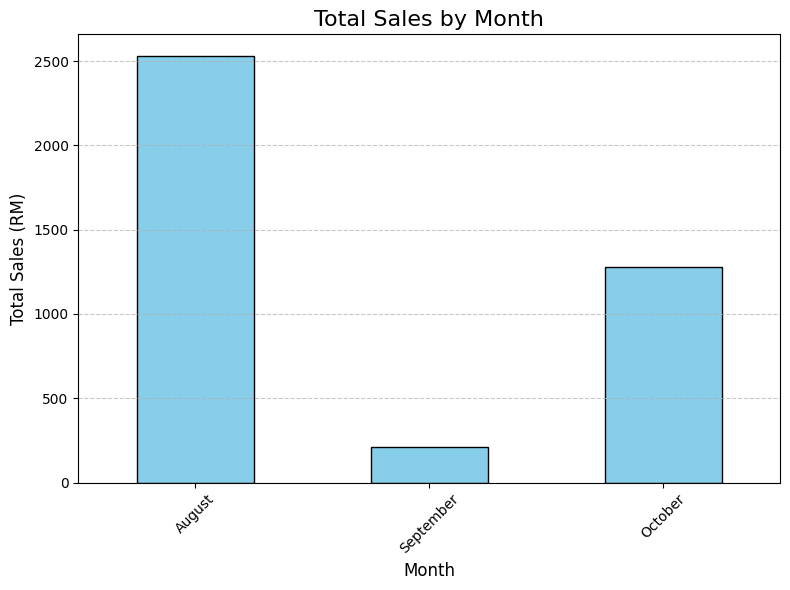

In [ ]:
# Monthly sales

import calendar
monthly_sales = df.groupby('Month')['Sales (RM)'].sum()
monthly_sales.index = monthly_sales.index.map(lambda x: calendar.month_name[x])


plt.figure(figsize=(8, 6))
monthly_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales (RM)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


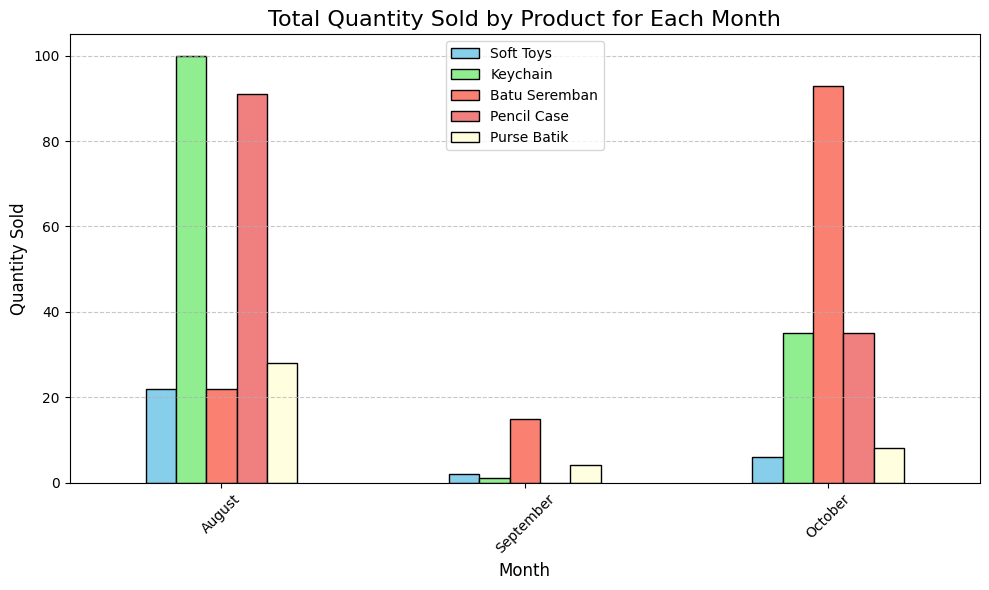

In [ ]:
#best perfmring model by number of item sold in each month

monthly_quantity = df.groupby("Month")[["Soft Toys", "Keychain", "Batu Seremban", "Pencil Case", "Purse Batik"]].sum()

monthly_quantity.index = monthly_quantity.index.map(lambda x: calendar.month_name[x])

monthly_quantity.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightyellow'], edgecolor='black')

plt.title("Total Quantity Sold by Product for Each Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


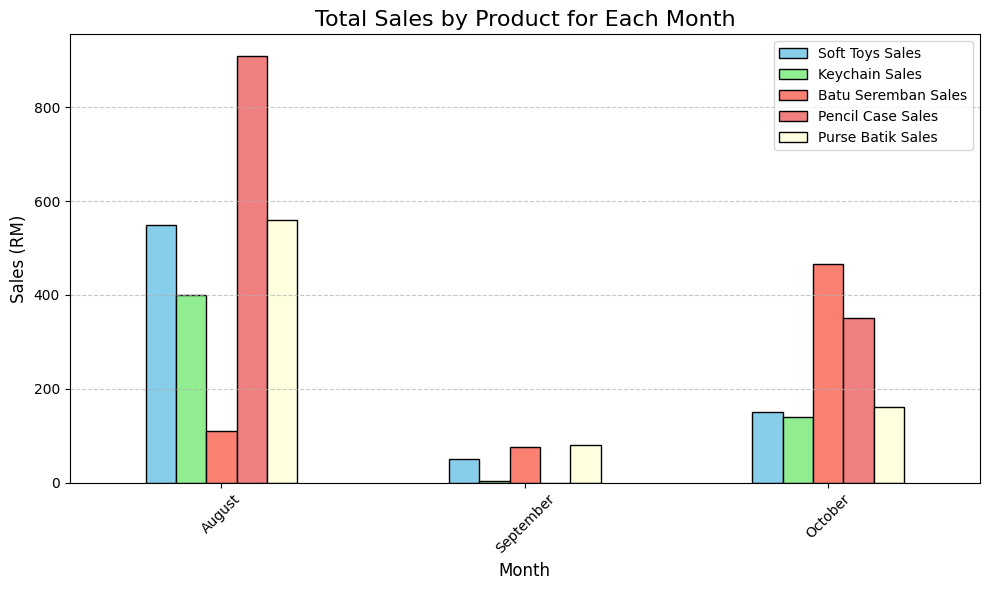

In [ ]:
# best revenue genderating product

prices = {
    "Soft Toys": 25,
    "Keychain": 4,
    "Batu Seremban": 5,
    "Pencil Case": 10,
    "Purse Batik": 20
}

# Calculate total sales for each product in each row (quantity * price)
for product in prices.keys():
    df[product + " Sales"] = df[product] * prices[product]

monthly_sales = df.groupby("Month")[["Soft Toys Sales", "Keychain Sales", "Batu Seremban Sales", "Pencil Case Sales", "Purse Batik Sales"]].sum()

monthly_sales.index = monthly_sales.index.map(lambda x: calendar.month_name[x])

monthly_sales.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'lightyellow'], edgecolor='black')

plt.title("Total Sales by Product for Each Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales (RM)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


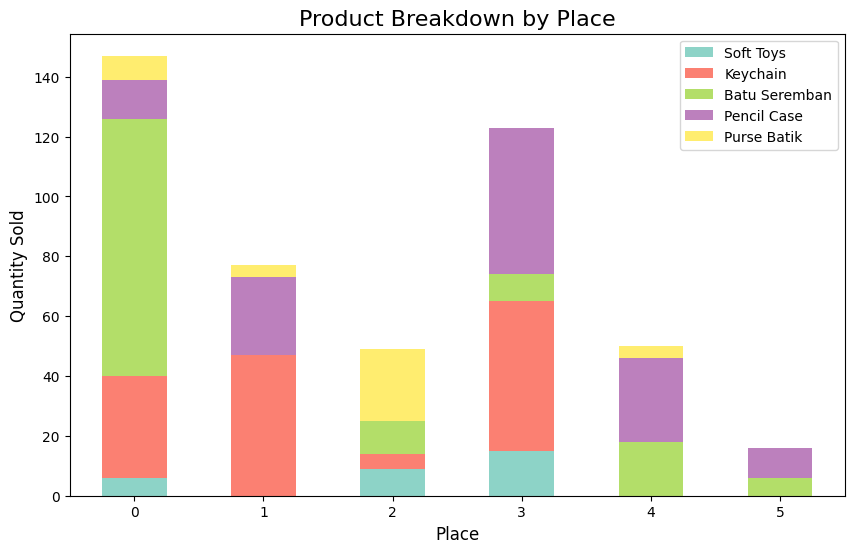

In [ ]:
#product breakdown by place
place_sales = df.groupby('Place')[['Soft Toys', 'Keychain', 'Batu Seremban', 'Pencil Case', 'Purse Batik']].sum()
place_sales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set3')
plt.title("Product Breakdown by Place", fontsize=16)
plt.xlabel("Place", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=0)
plt.show()


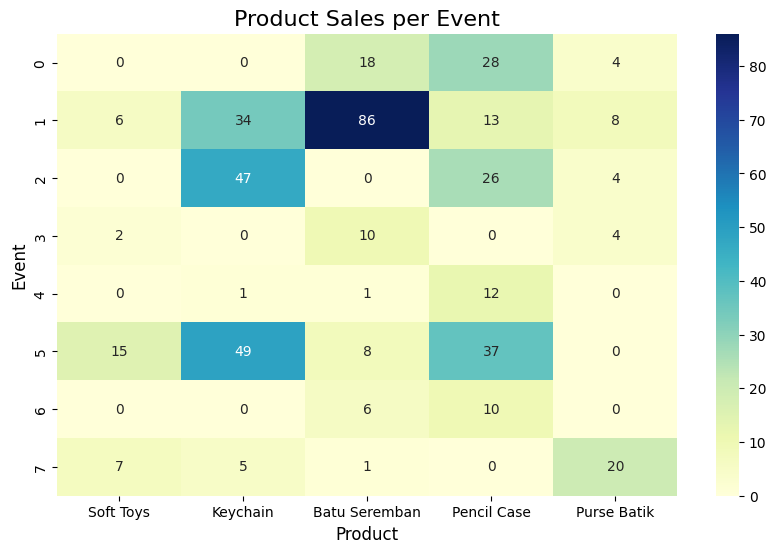

In [ ]:
import seaborn as sns

#product sales per event
event_product_sales = df.groupby('Event')[['Soft Toys', 'Keychain', 'Batu Seremban', 'Pencil Case', 'Purse Batik']].sum()
plt.figure(figsize=(10, 6))
sns.heatmap(event_product_sales, annot=True, cmap='YlGnBu', fmt='g')
plt.title("Product Sales per Event", fontsize=16)
plt.xlabel("Product", fontsize=12)
plt.ylabel("Event", fontsize=12)
plt.show()


<ipython-input-14-1227f572cbff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Event", y="Sales (RM)", data=df, palette='Set2')


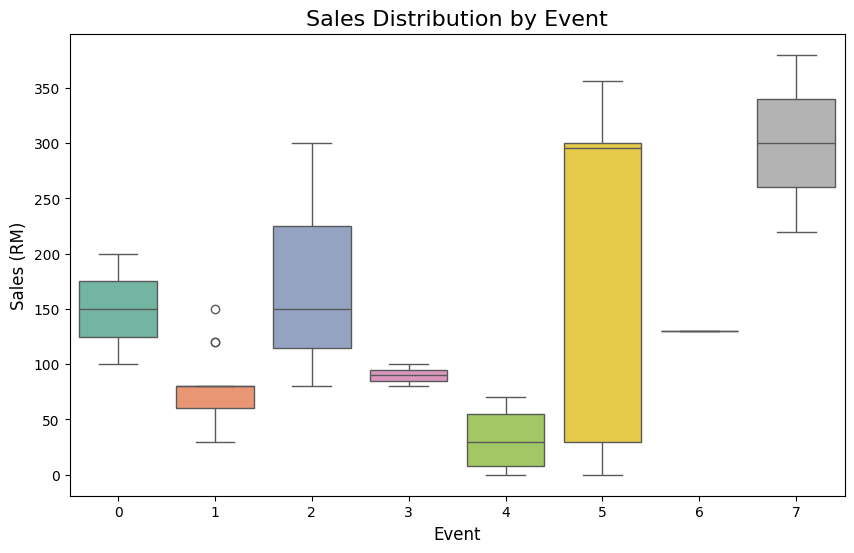

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x="Event", y="Sales (RM)", data=df, palette='Set2')
plt.title("Sales Distribution by Event", fontsize=16)
plt.xlabel("Event", fontsize=12)
plt.ylabel("Sales (RM)", fontsize=12)
plt.show()


##ML - Decision trees

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
# Features and targets
X = df[['Place', 'Event', 'Month']]  # Features
y = df[['Soft Toys', 'Keychain', 'Batu Seremban', 'Pencil Case', 'Purse Batik']]  # Targets

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

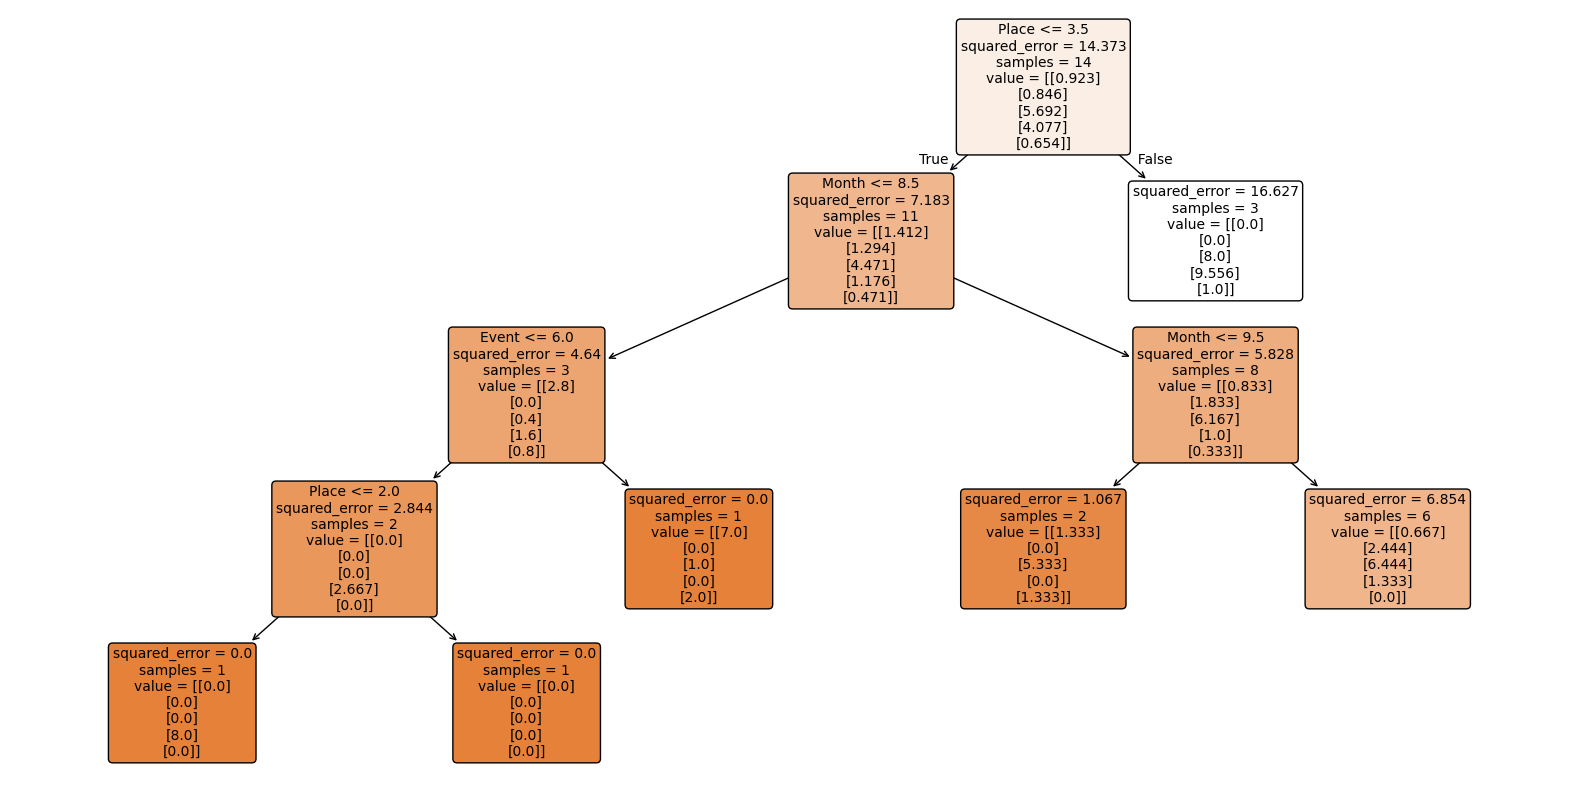

In [ ]:
# Build the pipeline (no need for preprocessor as Place and Event are already label-encoded)
model = Pipeline(steps=[
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Get one of the trees from the random forest
tree = model.named_steps['regressor'].estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=['Place', 'Event', 'Month'], class_names=['Soft Toys', 'Keychain', 'Batu Seremban', 'Pencil Case', 'Purse Batik'], rounded=True, fontsize=10)
plt.show()



In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')  # MAE for each product
print("Mean Absolute Error for each product:", mae)

# Predict for new data
new_data = pd.DataFrame({
    'Place': [1],  # Replace with label-encoded value of Place
    'Event': [2],  # Replace with label-encoded value of Event
    'Month': [8]
})
predicted_demand = model.predict(new_data)
print("Predicted demand for new data:", predicted_demand)

Mean Absolute Error for each product: [0.5826879  4.89298784 3.67281411 5.87755285 1.2912381 ]
Predicted demand for new data: [[ 0.11494048 16.83834524  0.27172619  7.87097619  1.40609524]]


## ML- Linear Regression

In [ ]:
df

,Place,Event,Sales (RM),Day,Month,Soft Toys,Keychain,Batu Seremban,Pencil Case,Purse Batik,Soft Toys Sales,Keychain Sales,Batu Seremban Sales,Pencil Case Sales,Purse Batik Sales
0,4,0,100,2,8,0,0,0,8,1,0,0,0,80,20
1,4,0,200,3,8,0,0,18,11,0,0,0,90,110,0
2,4,0,150,4,8,0,0,0,9,3,0,0,0,90,60
3,1,2,80,9,8,0,0,0,8,0,0,0,0,80,0
4,1,2,150,10,8,0,0,0,15,0,0,0,0,150,0
5,1,2,300,11,8,0,47,0,3,4,0,188,0,30,80
6,2,7,220,16,8,7,0,1,0,2,175,0,5,0,40
7,2,7,380,17,8,0,5,0,0,18,0,20,0,0,360
8,3,5,300,28,8,4,0,0,20,0,100,0,0,200,0
9,3,5,296,29,8,4,9,2,15,0,100,36,10,150,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
# Features and target variable
X = df[['Day', 'Month', 'Event']]  # Features
y = df['Sales (RM)']        # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print predictions
print("Predicted Sales:", y_pred)


Predicted Sales: [ 82.42229316  54.80776201  55.69538791  54.96914854 202.32946398
 202.41015724  55.13053506]


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 63.33441550663091
Root Mean Squared Error (RMSE): 71.71609735988928


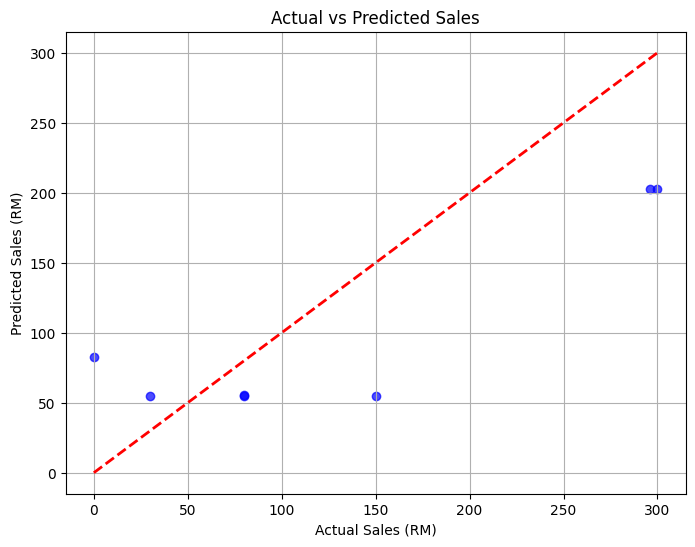

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales (RM)')
plt.ylabel('Predicted Sales (RM)')
plt.title('Actual vs Predicted Sales')
plt.grid()
plt.show()
